# Convolutional Neural Networks – Lab 3
RUBEN MARTINEZ GONZALEZ

Descarga de datos

In [ ]:
!gdown --id 1G1cO5KR_kKQCIvZOwxYh9jc-WcHUYQw4 -O ex2x.dat
!gdown --id 1V5YKP9ON8_86HvI9jzGJqi_OWVBMfXL- -O ex2y.dat

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Error:

	'NoneType' object has no attribute 'groups'

To report issues, please visit https://github.com/wkentaro/gdown/issues.
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Error:

	'NoneType' object has no attribute 'groups'

To report issues, please visit https://github.com/wkentaro/gdown/issues.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Implement in TensorFlow a Linear Regression model using Gradient Descent to
predict heights for various boys based on their ages. The y-values in the training
set (“ex2y.dat”) are the heights measured in meters, and the x-values in the
training set (“ex2x.dat”) are the ages of the boys corresponding to the heights.

Plot your training data set and label the axes (“Height in meters”, “Age in
years”). (20 pts)

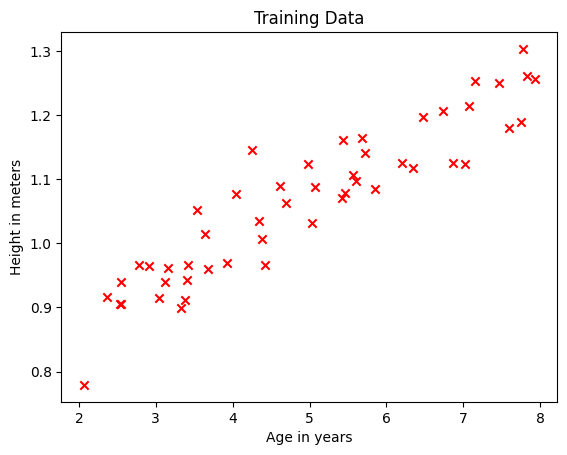

In [ ]:
# Load the data
X_train = np.loadtxt('ex2x.dat')
y_train = np.loadtxt('ex2y.dat')

plt.scatter(X_train, y_train, marker='x', c='r')
plt.title('Training Data')
plt.xlabel('Age in years')
plt.ylabel('Height in meters')
plt.show()

Initialize the parameters. Run one iteration of gradient descent from this initial
starting point. Print the value of your parameters after this first iteration. (20
pts)

In [ ]:
# Normalize the input data
X_mean = np.mean(X_train)
X_std = np.std(X_train)
X_train = (X_train - X_mean) / X_std

# Normalize the output data
y_mean = np.mean(y_train)
y_std = np.std(y_train)
y_train = (y_train - y_mean) / y_std

# Initialize variables
m = len(X_train)      # Number of training examples
alpha = 0.1          # Learning rate
theta = tf.Variable(tf.random.normal([2, 1]), dtype=tf.float32) # Initial random parameters

# Define the model
def hypothesis(X):
    return theta[0] + theta[1] * X

# Define the cost function (mean squared error)
def cost_function(X, y):
    return tf.reduce_mean(tf.square(hypothesis(X) - y))

# Define the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=alpha)

with tf.GradientTape() as tape:
    cost = cost_function(X_train, y_train)
    gradients = tape.gradient(cost, [theta])
    optimizer.apply_gradients(zip(gradients, [theta]))
    print("Cost after", 1, "iterations:", cost.numpy())
    print('Theta0 after one iteration:', theta[0])
    print('Theta1 after one iteration:', theta[1])

Cost after 1 iterations: 2.3229973
Theta0 after one iteration: tf.Tensor([-0.20127587], shape=(1,), dtype=float32)
Theta1 after one iteration: tf.Tensor([-0.23788518], shape=(1,), dtype=float32)


Continue running gradient descent for more iterations until your parameters
converge. Show your parameters final values. (20 pts)

In [ ]:
# Perform gradient descent
for i in range(200):
    # Perform one step of gradient descent
    with tf.GradientTape() as tape:
        cost = cost_function(X_train, y_train)
    gradients = tape.gradient(cost, [theta])
    optimizer.apply_gradients(zip(gradients, [theta]))

    # Print cost every 50 iterations
    if i % 50 == 0:
        print("Cost after", i, "iterations:", cost.numpy())

# Get the learned parameters
final_theta = theta.numpy()
print('Final Theta:', final_theta.ravel())

Cost after 0 iterations: 1.5378155
Cost after 50 iterations: 0.14193678
Cost after 100 iterations: 0.14193676
Cost after 150 iterations: 0.14193676
Final Theta: [1.5838012e-08 9.2631692e-01]


After convergence, plot the straight line fit from your algorithm on the same
graph as your training data. (20 pts

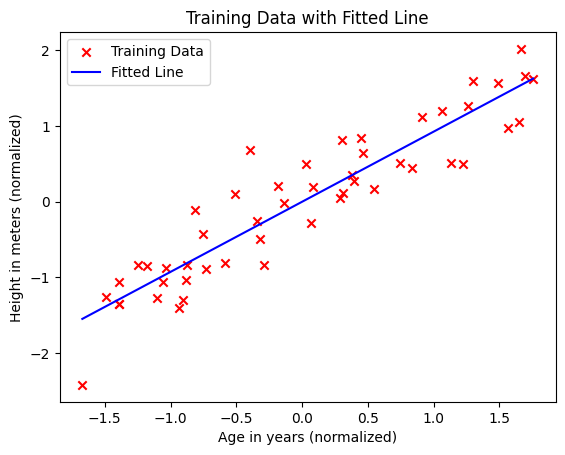

In [ ]:
# Plot the training data and the fitted line
plt.scatter(X_train, y_train, marker='x', c='r', label='Training Data')
plt.plot(X_train, final_theta[0] + final_theta[1] * X_train, color='b', label='Fitted Line')
plt.title('Training Data with Fitted Line')
plt.xlabel('Age in years (normalized)')
plt.ylabel('Height in meters (normalized)')
plt.legend()
plt.show()

Finally, use your trained model to predict the height for two boys of age 3.5 and
age 7. Print your results. (20 pts

In [ ]:
# Predict heights for boys of age 3.5 and 7
age_3_5_height = (final_theta[0] + final_theta[1] * (3.5 - X_mean) / X_std) * y_std + y_mean
age_7_height = (final_theta[0] + final_theta[1] * (7 - X_mean) / X_std) * y_std + y_mean

# Print the predicted heights
print('Predicted height for a boy of age 3.5:', round(age_3_5_height[0], 2))
print('Predicted height for a boy of age 7:', round(age_7_height[0], 2))

Predicted height for a boy of age 3.5: 0.97
Predicted height for a boy of age 7: 1.2
